In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('data/diamonds_new.csv')
df.head(10)

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
5,0.24,Very Good,J,VVS2,57.0,3.94,3.96,2.48,168.0
6,0.24,Very Good,I,VVS1,57.0,3.95,3.98,2.47,168.0
7,0.26,Very Good,H,SI1,55.0,4.07,4.11,2.53,168.5
8,0.22,Fair,E,VS2,61.0,3.87,3.78,2.49,168.5
9,0.23,Very Good,H,VS1,61.0,4.00,4.05,2.39,169.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [27]:
df.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [28]:
df['color'].value_counts()

G    11236
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

<Axes: >

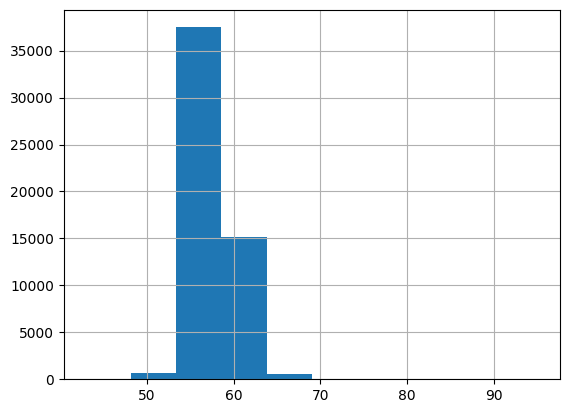

In [29]:
df['table'].hist()

In [30]:
df[(df['x']==0) | (df['y']==0) | (df['z']==0)].index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [31]:
df2 = df.copy()

In [32]:
df2[(df2['y'] > 15) | (df2['z'] > 15)].index

Int64Index([24067, 48410, 49189], dtype='int64')

In [33]:
df3 = df2.drop([24067, 48410, 49189])

In [34]:
df3['carat'] = df3['carat'].fillna(df3['carat'].median())

In [35]:
df3['table'] = df3['table'].fillna(df3['table'].median())

In [36]:
df3["color"] = df3['color'].fillna("G")

In [37]:
y = df3['price_new']
x = df3.drop("price_new", axis=1)

In [38]:
x = pd.get_dummies(x)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [40]:
mn = MinMaxScaler()

In [41]:
x = mn.fit_transform(x)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=134)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
x.shape

(53937, 25)

In [45]:
model1 = Sequential()
model1.add(Dense(32, activation = 'relu', input_shape = (25,)))
model1.add(Dense(16, activation = 'relu'))
model1.add(Dense(8, activation = 'relu'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                832       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
Total params: 1,496
Trainable params: 1,496
Non-trainable params: 0
_________________________________________________________________


2023-03-24 19:39:31.628038: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-24 19:39:31.628391: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-24 19:39:31.628436: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (neeraj-HP-Laptop): /proc/driver/nvidia/version does not exist
2023-03-24 19:39:31.629795: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
model1.compile(optimizer='sgd', loss='mean_squared_error')

In [47]:
model1.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
338/338 [==============================] - 1s 2ms/step - loss: 726183742275584.0000
Epoch 2/10
338/338 [==============================] - 1s 2ms/step - loss: 7871417.5000
Epoch 3/10
338/338 [==============================] - 1s 2ms/step - loss: 7871415.0000
Epoch 4/10
338/338 [==============================] - 1s 1ms/step - loss: 7871416.0000
Epoch 5/10
338/338 [==============================] - 1s 2ms/step - loss: 7871416.5000
Epoch 6/10
338/338 [==============================] - 1s 2ms/step - loss: 7871419.0000
Epoch 7/10
338/338 [==============================] - 1s 2ms/step - loss: 7871421.5000
Epoch 8/10
338/338 [==============================] - 1s 2ms/step - loss: 7871417.5000
Epoch 9/10
338/338 [==============================] - 1s 2ms/step - loss: 7871416.0000
Epoch 10/10
338/338 [==============================] - 1s 2ms/step - loss: 7871414.5000


In [48]:
model1.evaluate(x_test, y_test)

338/338 [==============================] - 1s 1ms/step - loss: 7740690.5000


7740690.5

In [54]:
model2 = Sequential()
model2.add(Dense(64, activation = 'relu', input_shape = (25,)))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(1))

In [55]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                1664      
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 64)               

In [56]:
model2.compile(optimizer='sgd', loss='mean_squared_error')

In [57]:
model2.fit(x_train, y_train, epochs=30, batch_size=128)

Epoch 1/30
338/338 [==============================] - 1s 2ms/step - loss: nan
Epoch 2/30
338/338 [==============================] - 1s 2ms/step - loss: nan
Epoch 3/30
338/338 [==============================] - 1s 2ms/step - loss: nan
Epoch 4/30
338/338 [==============================] - 1s 2ms/step - loss: nan
Epoch 5/30
338/338 [==============================] - 1s 2ms/step - loss: nan
Epoch 6/30
338/338 [==============================] - 1s 3ms/step - loss: nan
Epoch 7/30
338/338 [==============================] - 1s 2ms/step - loss: nan
Epoch 8/30
338/338 [==============================] - 1s 2ms/step - loss: nan
Epoch 9/30
338/338 [==============================] - 1s 2ms/step - loss: nan
Epoch 10/30
338/338 [==============================] - 1s 2ms/step - loss: nan
Epoch 11/30
338/338 [==============================] - 1s 2ms/step - loss: nan
Epoch 12/30
338/338 [==============================] - 1s 2ms/step - loss: nan
Epoch 13/30
338/338 [==============================] - 1s 3ms

In [58]:
model2.evaluate(x_test, y_test)

338/338 [==============================] - 1s 1ms/step - loss: nan


nan

In [60]:
from tensorflow.keras.layers import Dropout

In [61]:
model3 = Sequential()
model3.add(Dense(128, activation = 'relu', input_shape = (25,)))
model3.add(Dense(128, activation = 'relu'))
model3.add(Dropout(0.15))
model3.add(Dense(128, activation = 'relu'))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dropout(0.15))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(32, activation = 'relu'))
model3.add(Dropout(0.15))
model3.add(Dense(16, activation = 'relu'))
model3.add(Dense(1))

In [62]:
model3.compile(optimizer='adam', loss='mean_squared_error')

In [63]:
model3.fit(x_train, y_train, epochs=30, batch_size=128)

Epoch 1/30
338/338 [==============================] - 2s 4ms/step - loss: 2588949.2500
Epoch 2/30
338/338 [==============================] - 1s 4ms/step - loss: 265836.6250
Epoch 3/30
338/338 [==============================] - 1s 4ms/step - loss: 246290.3281
Epoch 4/30
338/338 [==============================] - 1s 4ms/step - loss: 227175.2188
Epoch 5/30
338/338 [==============================] - 1s 4ms/step - loss: 216204.3750
Epoch 6/30
338/338 [==============================] - 1s 4ms/step - loss: 193606.3281
Epoch 7/30
338/338 [==============================] - 1s 4ms/step - loss: 182931.1094
Epoch 8/30
338/338 [==============================] - 1s 4ms/step - loss: 172542.5000
Epoch 9/30
338/338 [==============================] - 1s 4ms/step - loss: 167490.1875
Epoch 10/30
338/338 [==============================] - 1s 4ms/step - loss: 158718.8125
Epoch 11/30
338/338 [==============================] - 1s 4ms/step - loss: 156070.0625
Epoch 12/30
338/338 [==============================

In [64]:
model3.evaluate(x_test, y_test)

338/338 [==============================] - 1s 2ms/step - loss: 781033.4375


781033.4375

In [66]:
y_pred = model3.predict(x_test)

338/338 [==============================] - 1s 1ms/step


In [67]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(y_test, y_pred)

ValueError: continuous is not supported